In [41]:
import os
import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
train_dir = 'dogs_and_cats_small/train'
val_dir = 'dogs_and_cats_small/validate'

In [21]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [40]:
def create_model():
    model = keras.models.Sequential()
    # model_2.add(data_augmentation)
    # model_2.add(keras.layers.Rescaling(scale=1./255, input_shape=(150,150, 3)))
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150, 3)))
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(512, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

    return model

model_1 = create_model()
# model_1.summary()

In [43]:
epochs = 100

# history = model_1.fit(train_generator, epochs=epochs, validation_data=validation_generator)
# history_df = pd.DataFrame(history.history)
# hist_json = "history.json"
# with open(hist_json, mode='w') as f:
#     history_df.to_json(f)


Epoch 1/2
100/100 [==============================] - 68s 680ms/step - loss: 0.6735 - accuracy: 0.5785 - val_loss: 0.6573 - val_accuracy: 0.6040
Epoch 2/2
100/100 [==============================] - 68s 680ms/step - loss: 0.6677 - accuracy: 0.5925 - val_loss: 0.6498 - val_accuracy: 0.6165


In [80]:
data = pd.read_json("history.json")
print(data)
print(data['accuracy'])

       loss  accuracy  val_loss  val_accuracy
0  0.673500    0.5785  0.657297        0.6040
1  0.667672    0.5925  0.649836        0.6165
0    0.5785
1    0.5925
Name: accuracy, dtype: float64


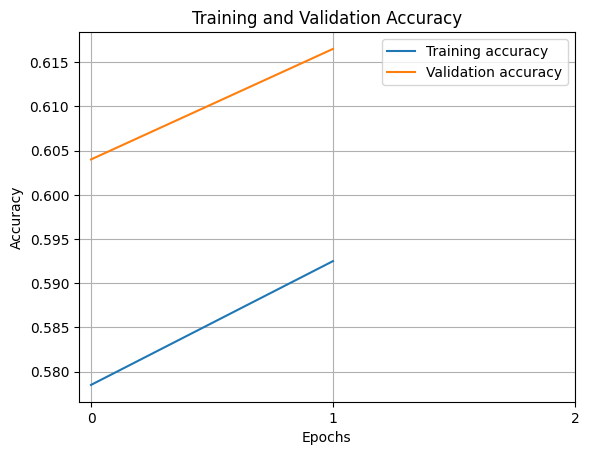

In [84]:
plt.plot(data['accuracy'], label= 'Training accuracy')
plt.plot(data['val_accuracy'], label = 'Validation accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.xticks(np.arange(0, int(epochs+1)))
plt.legend(loc='best')
plt.show()